<a href="https://colab.research.google.com/github/brahimje/DataMining/blob/main/ImageMining/Atelier1CBIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><bold>ImageMining:
Atelier N°1: CBIR</bold>

Prof : My Abdelouahed Sabri
abdelouahed.sabri@gmail.com</center></h1>

Table des matières
<ul>
1	Introduction </br>
2	Base d’images</br>
3	Implémentation</br>
 
> 3.1	Lecture des images</br> 
3.2	Recherche par image entière</br>
3.3	Recherche par Couleur</br>
3.4	Recherche par Histogramme</br>
3.5	Recherche par texture</br>
3.1	Recherche par Forme</br>
3.2	Etude comparative</br>
3.3	Robustesse vis-à-vis des transformations géométriques</br>

4	Conclusion</br>


---
<h2>1	Introduction</h2>
L’objectif de cet atelier est d’initier le lecteur aux systèmes de recherches basées sur le contenu (CBIR, Content Based Image Retrieval). Le CBIR permet entre autres de rechercher les images similaires à une image requête dans une base, constituées, d’images. Cette similarité est calculée non pas sur les images elles-mêmes mais par le biais d’une description (descripteur) choisie par celui qui a conçu le système. La figure ci-dessous présente une vue globale d’un système CBIR.



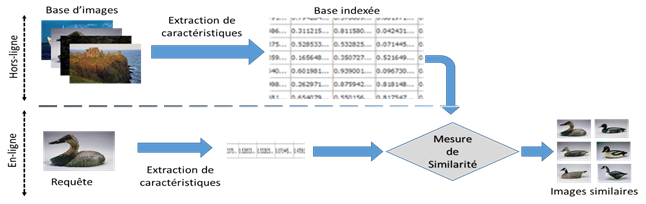

Un système CBIR est organisé en deux phases :

1.	Phase hors ligne, appelée souvent indexation, où pour chaque image un vecteur descripteur sera extrait et sauvegarder sous forme de base d’indexes
2.	Phase en ligne, appelée souvent recherche, où le système recherche les images similaires à une image requête. Le même type de descripteur sera extrait de l’image requête et comparé avec la base d’indexes. 

Deux paramètres sont à prendre en considération lors de l’élaboration d’un système CBIR; le premier est la nature des descripteurs (appelés aussi caractéristiques) à utiliser pour former la base d’indexes, et le deuxième c’est la mesure de similarité à utiliser pour chercher les images les plus similaires pour une image requête. Ainsi, la recherche ce fait par mesure de distance entre descripteurs au lieu des images. 

Les descripteurs utilisés pour former la base d’indexes sont généralement des descripteurs bas niveau, à savoir ; la forme, la couleur et la texture. Et la mesure de similarité utilisée peut être une simple distance euclidienne ou une projection multidimensionnelle. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2>2	Base d’images</h2>
Pour cet atelier nous allons utiliser une partie de la base d’images COREL. La base COREL contient 10800 images classées en 80 groupes d’images. Cette base est parfaite pour comprendre les fondamentaux du CBIR. Ici, nous allons utiliser seulement 270 images appartenant à deux groupes d’images et qui sont regroupées dans seule dossier. <br>
Il faut charger la base aprés l'avoir décompresser sur votre espace Drive. Il est possible d'utiliser une base compresser (.*zip) et la décompresser par code python.

<h2>3	Implémentation</h2>
Afin de développer notre système CBIR nous avons opté, dans cet atelier, pour Matlab comme environnement de travail car il est très puissant dans le traitement matriciel et ainsi pour le traitement d’images de même que plusieurs fonctionnalités sont déjà implémentées permettant de créer facilement notre CBIR.

Pour la première étape qui est l’indexation, le premier code à écrire est pour parcourir toutes les images de la base de données pour extraire de chacune un vecteur descripteur convenable. 
- Copier la base d’images dans le dossier par défaut de Matlab pour éviter les 
- Ne pas écrire le code directement sur l’invite de commande mais plutôt créer un ou plusieurs fichiers *.m, les modifier et les exécuter à fur et à mesure de l’avancement de cet atelier. 

<h2>3.1	Lecture des images</h2>
L’objectif du premier code  est de lire toutes les images de la base et d’afficher les 6 premières


In [2]:
from os import listdir
from matplotlib import image
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='/content/drive/MyDrive/dataset/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = image.imread(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	# Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
	print(' %s %s ' % (filename, img_data.shape))

 382021.jpg (80, 120, 3) 
 382007.jpg (80, 120, 3) 
 382022.jpg (80, 120, 3) 
 382026.jpg (80, 120, 3) 
 382034.jpg (80, 120, 3) 
 382035.jpg (80, 120, 3) 
 382019.jpg (80, 120, 3) 
 382001.jpg (80, 120, 3) 
 382025.jpg (80, 120, 3) 
 382029.jpg (80, 120, 3) 
 382020.jpg (80, 120, 3) 
 382013.jpg (80, 120, 3) 
 382012.jpg (80, 120, 3) 
 382006.jpg (80, 120, 3) 
 382032.jpg (80, 120, 3) 
 382017.jpg (80, 120, 3) 
 382033.jpg (80, 120, 3) 
 382030.jpg (80, 120, 3) 
 382002.jpg (80, 120, 3) 
 382028.jpg (80, 120, 3) 
 382018.jpg (80, 120, 3) 
 382014.jpg (80, 120, 3) 
 382041.jpg (80, 120, 3) 
 382073.jpg (80, 120, 3) 
 382039.jpg (80, 120, 3) 
 382077.jpg (80, 120, 3) 
 382045.jpg (80, 120, 3) 
 382063.jpg (80, 120, 3) 
 382072.jpg (80, 120, 3) 
 382037.jpg (80, 120, 3) 
 382047.jpg (80, 120, 3) 
 382050.jpg (80, 120, 3) 
 382038.jpg (80, 120, 3) 
 382061.jpg (80, 120, 3) 
 382042.jpg (80, 120, 3) 
 382081.jpg (80, 120, 3) 
 382078.jpg (80, 120, 3) 
 382064.jpg (80, 120, 3) 
 382054.jpg 

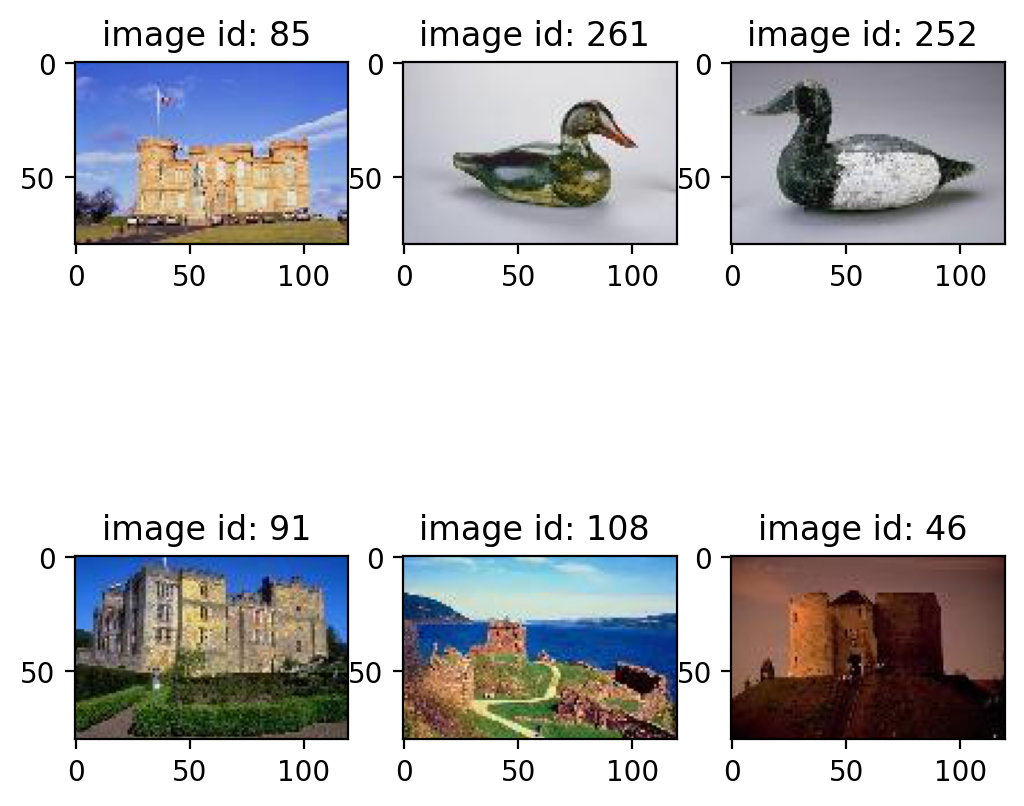

In [3]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
  ax1 = fig.add_subplot(2, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))


<h2>3.2	Recherche par image entière</h2>
Pour une première implémentation d’un système CBIR, l’objectif est d’afficher les 5 images les plus similaires à l’image requête « Imrequest.jpg » en se basant sur un calcul de différence entre images entières.<br>
L'image requete est dans un dossier "img_requetes" dans Drive

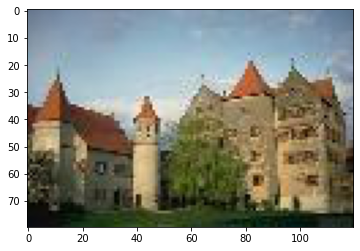

In [4]:
img_requete = image.imread('/content/drive/MyDrive/dataset/image.jpeg')
plt.imshow(img_requete) 


Nous allons utiliser la distance enclidienne entre l'image requéte et toutes 

1.   Élément de liste
2.   Élément de liste

les images de la base. Les distances seront enregistrées dans un dictionnaire et seront par la suite triées par ordre croissant. 

In [5]:
# Comparer les pixels des deux images utilisant une distance enculidienne
import scipy.spatial.distance as dist
import numpy as np

img_requete1=np.array(img_requete)
img_requete2= img_requete1.flatten()
# penser à utiliser un dictionnaire pour garder les indices aprés tri
distances = {}
for i in range (len(loaded_images)):
  # Code pour calculer la distance eulcidienne entre l'image requête et les images de la base
    # Il faut convertir les matrices 3D en un vecteur 1D en utilisant la méthode flatten()
    # Utiliser la méthode dist.euclidean(Vecteur1, vecteur2)
  image=np.array(loaded_images[i])
  image2=image.flatten()
  distances[i]=dist.euclidean(image2, img_requete2)
print('before:')  
print(distances) 
print('after:')  
# Code pour trier les distances par ordre croissant
distances= sorted(distances.items(),key=lambda x:x[1])
# Afficher les distances aprés tri
print(distances)

before:
{0: 27161.099756821335, 1: 29224.503964994856, 2: 23095.406296491085, 3: 24746.672746048105, 4: 27844.44296444086, 5: 27093.212618661524, 6: 25121.312744361112, 7: 24756.902330461297, 8: 22381.631575915104, 9: 23747.01657050839, 10: 25812.74441046515, 11: 24372.892606336245, 12: 22508.459187603225, 13: 26722.684820204726, 14: 21602.157924614847, 15: 26779.919249318136, 16: 29240.791524854452, 17: 22131.295465923362, 18: 22861.16845220296, 19: 24398.320188078524, 20: 28590.01804826293, 21: 26243.72595497827, 22: 29857.02714605056, 23: 23382.08068158178, 24: 26542.76409871436, 25: 25872.861341567925, 26: 25022.06636151379, 27: 27993.35265737207, 28: 23389.684649434672, 29: 26905.83877153805, 30: 24678.73767031045, 31: 25244.36939200502, 32: 25977.391535718132, 33: 26819.97665919939, 34: 28032.965825969968, 35: 24324.831797979612, 36: 27066.62324709161, 37: 27806.79708272781, 38: 22080.62098311549, 39: 23461.334254470694, 40: 27980.404964903562, 41: 23802.794079687366, 42: 27073.6

Nous allons afficher l'image requéte ainsi que les 5 images les plus similaires en terme de distance enclidienne

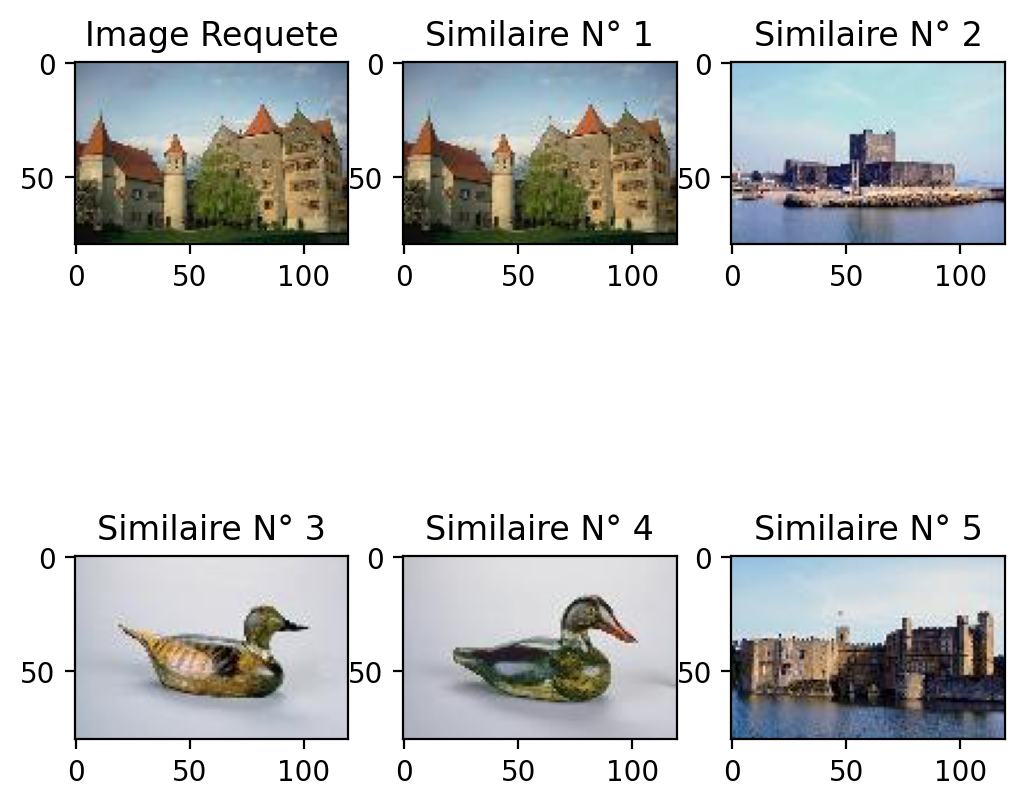

In [6]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distances[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))

La première image trouvée est identique à l’image requête ce qui montre que le système développé a pu répondre à la requête correctement tandis que les autres images ne sont pas visuellement très similaires. L’autre inconvénient et qui est majeur et qu’il est long en termes de temps de recherche et très gourment en mémoire. Ainsi, le temps de recherche sur la base de seulement 270 images est de 45 secondes. Aussi, il n’est pas du tout robuste vis-à-vis des transformations sur l’image. Pour exemple vous pouvez roter l’image requête et vous allez voir que le résultat est complétement erroné. <br>
L’idéal est, qu’au lieu de chercher sur la totalité des images, d’utiliser avec des caractéristiques (descripteurs) de chaque image. 3 types de caractéristiques sont les plus utilisées dans un système CBIR : la Couleur, la Forme et la Texture. <br>
Par la suite, nous allons présenter et utiliser chacune des 3 caractéristiques pour créer un système CBIR performant et puissant.

<h2>3.3	Recherche par Couleur</h2>
Dans cette partie, la caractéristique couleur sera utilisée pour développer notre système CBIR. Contrairement à la recherche par similarité sur toute l’image qui consiste à calculer la différence entre l’image requête et toutes les images de la base, et ceci à chaque recherche, le CBIR consiste dans sa partie hors-ligne de créer une base d’index à base des caractéristiques des images de la base et la recherche est effectuée par similarité entre caractéristiques de l’image requête et caractéristiques de la base d’index. Tout cela nous ramène à dire que la première étape est d’extraire, une fois pour toute, les caractéristiques couleurs des images de la base et l’enregistrer afin de l’utiliser dans chaque recherche. <br>
Le vecteur descripteur couleur à utiliser est constitué des valeurs des moments statistiques ; moyenne et variance de chaque composante couleur R, G et B. La taille du vecteur sera donc 6.<br>
Le code dans le fichier « CBIR_Color.m » permet en un premier temps d’indexer la base d’image et après de lancer la recherche pour une image requête et d’afficher les 5 images les plus similaires.
Le code contient 3 parties : <br>

1. La partie principale
2. La partie d’indexation ; la fonction « CBIR_Indexation » est appelée avec comme paramètre la taille du vecteur descripteur. Cette partie ne doit être exécutée qu’une seule fois<br>
3. La partie de recherche ; la fonction « CBIR_ Recherche » est appelée avec comme paramètres l’image requête, la matrice des descripteurs et les noms des images correspondantes.

Le vecteur descripteur est créé par la fonction « getFeatures » qui a comme arguments d’entrée l’image et la taille du vecteur. C’est cette fonction qu’on va modifier pour ajouter d’autres descripteurs par la suite. Cette fonction appelle la fonction « color_Moments » qui va retourner le les 6 moments de couleurs.


(270, 6)
[[1.10966387 0.62171381 1.31997237 0.69005542 1.48983702 0.76875752]
 [1.00952184 0.73368276 1.09898268 0.76652671 1.36595671 1.02532929]
 [1.4176591  0.70444618 1.35395412 0.67833266 1.10076582 0.74484213]
 ...
 [1.43231939 0.46705864 1.46548452 0.49223156 1.5994302  0.54347569]
 [1.53090346 0.45324883 1.52204135 0.44367093 1.5641333  0.48600212]
 [1.54753685 0.43316478 1.58224553 0.4130612  1.55436919 0.46962245]]
before:
{0: 0.3627502697002204, 1: 0.574052915747259, 2: 0.22666809154123474, 3: 0.6106948733329307, 4: 0.35279472509640214, 5: 0.468457258931667, 6: 0.5714767737217707, 7: 0.14785352852005912, 8: 0.14302714784136591, 9: 0.2720312238171001, 10: 0.40982363124576493, 11: 0.17544272668031372, 12: 0.16758027321367144, 13: 0.2617531939357622, 14: 0.09920423873046973, 15: 0.28890417427190257, 16: 0.6447999778326672, 17: 0.166814030320597, 18: 0.3177297678781336, 19: 0.38747856195735464, 20: 0.22055275882729278, 21: 0.28807839308914124, 22: 0.4402515676014207, 23: 0.18323

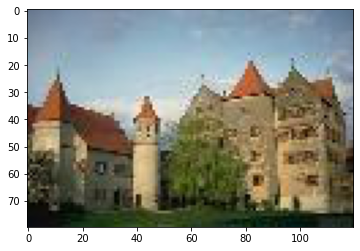

In [7]:
# la CBIR est constituée de 2 étapes; Indexation et Recherche
# On va créer une fonction pour l'indexation d'une image 
# C'est l'équivalent d'extraire une vecteur descripteur en se basant sur les moments statistiques des couleurs
import numpy as np
from PIL import Image
# la fonction color_Moment retourne un vecteur descripteur de 6 valeurs
# contenant la moyenne et la déviation standard de chaque canal RGB
# utiliser np.mean et np.std
# il faut normaliser les moments en les divisant par la moyenne

loaded_images = list()

path='/content/drive/MyDrive/dataset/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = Image.open(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)

img_requete = Image.open('/content/drive/MyDrive/dataset/image.jpeg')

def color_Moments(img):
  width, height = img.size
  listR = []
  listG = []
  listB = []
  somme=0
  for i in range(width):
    for j in range(height):
        
        # getting the RGB pixel value.
        r, g, b = img.getpixel((i, j))
        listR.append(r)
        listG.append(g)
        listB.append(b)

  list=[]
  list.append(np.mean(listR))
  list.append(np.std(listR))
  list.append(np.mean(listG))
  list.append(np.std(listG))
  list.append(np.mean(listB))
  list.append(np.std(listB))
  colorFeatures=np.array(list)/np.mean(list)
  
  return colorFeatures


# l'indexation consiste à créer une matrice d'index utilisant les moments de couleurs pour chacune des images de la base
# La méthode CBIR_Indexation retourne la matrice de caractéristiques
def CBIR_Indexation():
  features=[color_Moments(loaded_images[0])]
  for i in range (len(loaded_images)-1):
    features = np.vstack([features,color_Moments(loaded_images[i+1])])
  return features

index_Matrix=CBIR_Indexation()
# Afficher la taille de la matrice de caractéristiques et qui doit étre de taille égale à Nombre d'images dans la base multiplié par nombre de caractéristiques
print(index_Matrix.shape)
print(index_Matrix)

# la recherche consiste à calculer la distance euclidienne entre le vecteur descripteur de l'image requéte et la matrice de caractéristiques
# La méthode CBIR_Recherche admet comme argument l'image requéte et la matrice de caractéristiques
# Elle retourne un disctionnaire trié contenant les distances et les indices des images
def CBIR_Recherche(Imreq,ind_Matrix):
  distances = {}
  Im=color_Moments(Imreq)
  for i in range (len(loaded_images)):
    distances[i]=dist.euclidean(ind_Matrix[i], Im)

  print('before:')  
  print(distances) 
  print('after:')  
  # Code pour trier les distances par ordre croissant
  distances= sorted(distances.items(),key=lambda x:x[1])
  return distances

#img_requete = image.imread('ImageRequete.jpg')
plt.imshow(img_requete) 
distanes_CBIR=CBIR_Recherche(img_requete,index_Matrix)
print(distanes_CBIR)


Nous allons afficher l'image requéte ainsi que les 5 images les plus similaires en terme de distance enclidienne

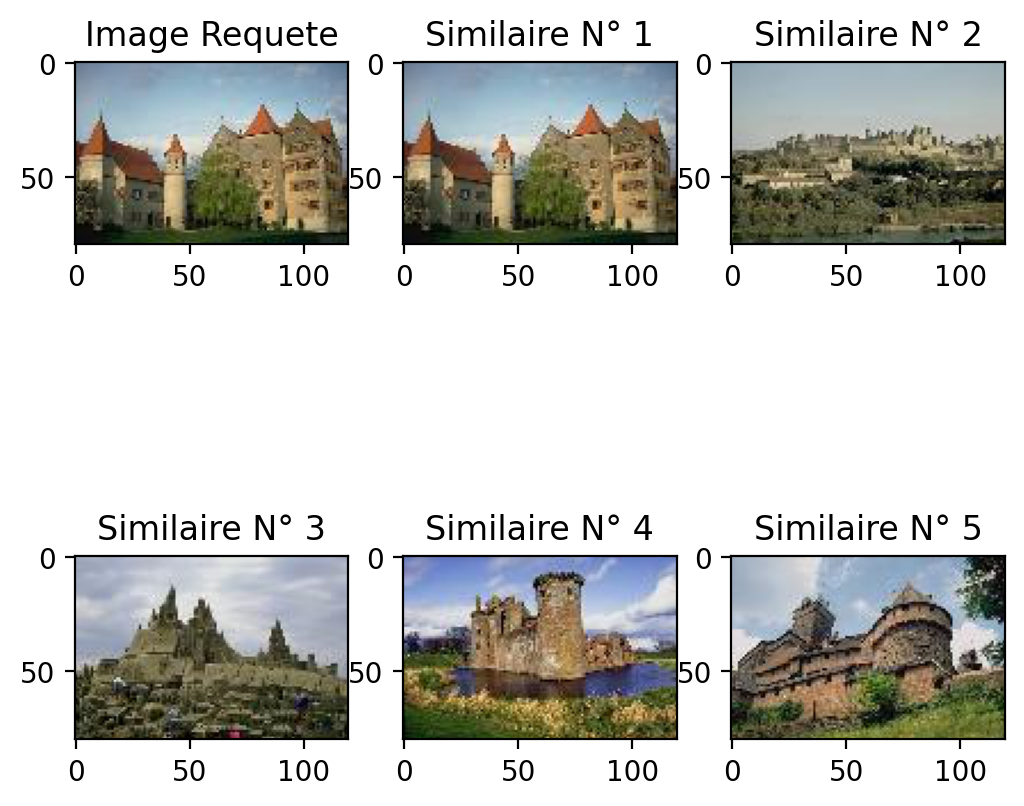

In [8]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distanes_CBIR[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))

before:
{0: 0.3627502697002204, 1: 0.574052915747259, 2: 0.22666809154123474, 3: 0.6106948733329307, 4: 0.35279472509640214, 5: 0.468457258931667, 6: 0.5714767737217707, 7: 0.14785352852005912, 8: 0.14302714784136591, 9: 0.2720312238171001, 10: 0.40982363124576493, 11: 0.17544272668031372, 12: 0.16758027321367144, 13: 0.2617531939357622, 14: 0.09920423873046973, 15: 0.28890417427190257, 16: 0.6447999778326672, 17: 0.166814030320597, 18: 0.3177297678781336, 19: 0.38747856195735464, 20: 0.22055275882729278, 21: 0.28807839308914124, 22: 0.4402515676014207, 23: 0.18323567347736988, 24: 0.23634320161193068, 25: 0.5061593795977128, 26: 0.6086459784571759, 27: 0.4990236605227774, 28: 0.22863841919114158, 29: 0.3638428125863897, 30: 0.34432811301682875, 31: 0.5024215786191529, 32: 0.26247253249792346, 33: 0.5500936728215352, 34: 0.38379102254897524, 35: 0.5935590067448819, 36: 0.5730192498093448, 37: 0.23934759214504675, 38: 0.20123883245999047, 39: 0.23050075851152804, 40: 0.5449534908264168,

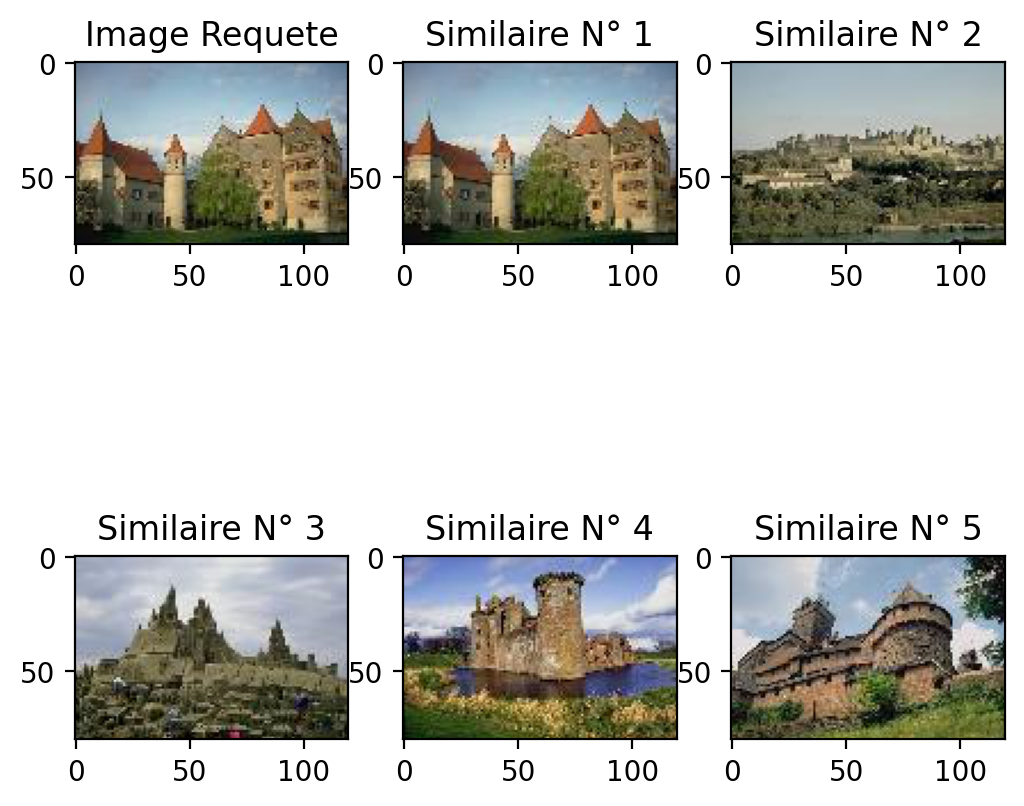

In [33]:
# Nous allons modifier l'image requéte pour voir le comportement de notre système
img_requete = Image.open('/content/drive/MyDrive/dataset/image.jpeg')
#plt.imshow(img_requete) 
distanes_CBIR=CBIR_Recherche(img_requete,index_Matrix)
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distanes_CBIR[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))

L’utilisation des moments statistiques semblent donner de bons résultats que la recherche par image entière. Reste à tester la robustesse vis-à-vis des transformations comme la rotation, la translation et le changement d’échelle. 

<h2>3.4	Recherche par Histogramme</h2>
L’histogramme est souvent utilisé pour regrouper le nombre de pixels par intensité. L’histogramme peut être élaboré sur n’importe quel espace couleur ; RGB, HSV, … et même à niveau de gris. Des etudes ont montré que l’espace de couleur HSV est le plus adapté à ce type de système de recherche. L’histogramme est un vecteur dont la taille est égale au nombre de valeur d’intensité dans l’image. Pour l’utiliser comme vecteur descripteur, l’idée est de quantifier l’histogramme en un nombre limité. La taille du vecteur descripteur a été largement discutée et la taille adopté est de 32 caractéristiques. Une quantification par niveau pour chaque composante H, S et V est élaborée. Pour la composante H (hue) le niveau choisi est 8, pour la composante S (saturation) le niveau est 2 et pour la composante V (value) le niveau est 2. <br>
Modifier le code  pour permettre d’avoir un système CBIR utilisant un vecteur descripteur de taille 1x38 composé de couleur et d’histogramme. Il faut modifier la valeur de « fsize » à 39 pour avoir un vecteur de 38 descripteurs (6 pour les moments et 32 pour l’histogramme). Il faut aussi ajouter la fonction « hsvHistogramFeatures » qui admet comme argument d’entrer une image et qui retourne le vecteur descripteur créé à partir de l’histogramme. La fonction « getFeatures » doit être modifiée pour concaténer les deux vecteurs descripteurs de moments et d’histogramme.


rgb --> hsv


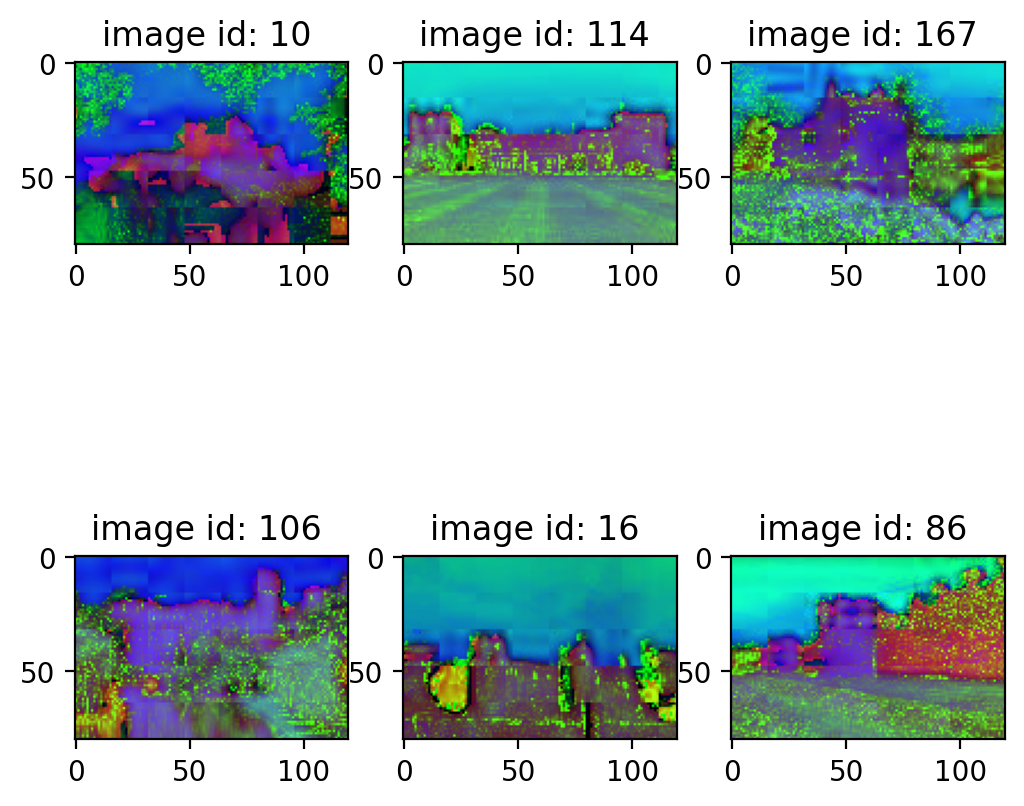

In [34]:
import cv2
import matplotlib.pyplot as plt
import random
loaded_images_HSV = list()
for i in range (len(loaded_images)):
  loaded_images_HSV.append(cv2.cvtColor(np.array(loaded_images[i]), cv2.COLOR_BGR2HSV))

img_requete_HSV = cv2.cvtColor(np.array(img_requete), cv2.COLOR_BGR2HSV)
fig = plt.figure(figsize=(6, 6), dpi=200)
id=random.sample(range(270), 6)
for i in range(6):
  ax1 = fig.add_subplot(2, 3, i+1)
  ax1.imshow(loaded_images_HSV[id[i]])
  ax1.set_title('image id: %s '% (id[i]))

In [35]:
def hsvHistogramFeatures(image):
  hist = cv2.calcHist([image], [0, 1, 2], None, [8, 2, 2],[0, 180, 0, 256, 0, 256])
  hist = cv2.normalize(hist, hist).flatten()
  return hist

In [36]:
def CBIR_IndexationH():
  features=[hsvHistogramFeatures(loaded_images_HSV[0])]
  for i in range (len(loaded_images_HSV)-1):
    features = np.vstack([features,hsvHistogramFeatures(loaded_images_HSV[i+1])])
  return features

index_MatrixH=CBIR_IndexationH()
print(index_MatrixH.shape)

def CBIR_RechercheH(Imreq,ind_Matrix):
  distances = {}
  Im=hsvHistogramFeatures(Imreq)
  for i in range (len(loaded_images)):
    distances[i]=dist.euclidean(ind_Matrix[i], Im)
  distances= sorted(distances.items(),key=lambda x:x[1])
  return distances

distances_CBIR_H=CBIR_RechercheH(img_requete_HSV,index_MatrixH)
print(distances_CBIR_H)

(270, 32)
[(61, 0.0), (98, 0.20492707192897797), (51, 0.24102674424648285), (7, 0.2542242705821991), (88, 0.26339539885520935), (79, 0.2864157259464264), (67, 0.32823845744132996), (182, 0.3354718089103699), (150, 0.37407535314559937), (80, 0.38669538497924805), (4, 0.38788309693336487), (66, 0.3958947956562042), (106, 0.39818987250328064), (119, 0.40265560150146484), (184, 0.40313151478767395), (134, 0.42274603247642517), (246, 0.440212219953537), (83, 0.4416476786136627), (240, 0.44278520345687866), (213, 0.44338539242744446), (105, 0.4451007544994354), (24, 0.4499302804470062), (162, 0.4549197852611542), (156, 0.4600352644920349), (90, 0.4602517783641815), (60, 0.46571463346481323), (153, 0.4663671851158142), (237, 0.4859544038772583), (187, 0.49458858370780945), (75, 0.4953592121601105), (136, 0.4959796369075775), (262, 0.4960936903953552), (81, 0.49675610661506653), (178, 0.4970166087150574), (73, 0.49837884306907654), (166, 0.5000590085983276), (56, 0.5074219703674316), (206, 0.5

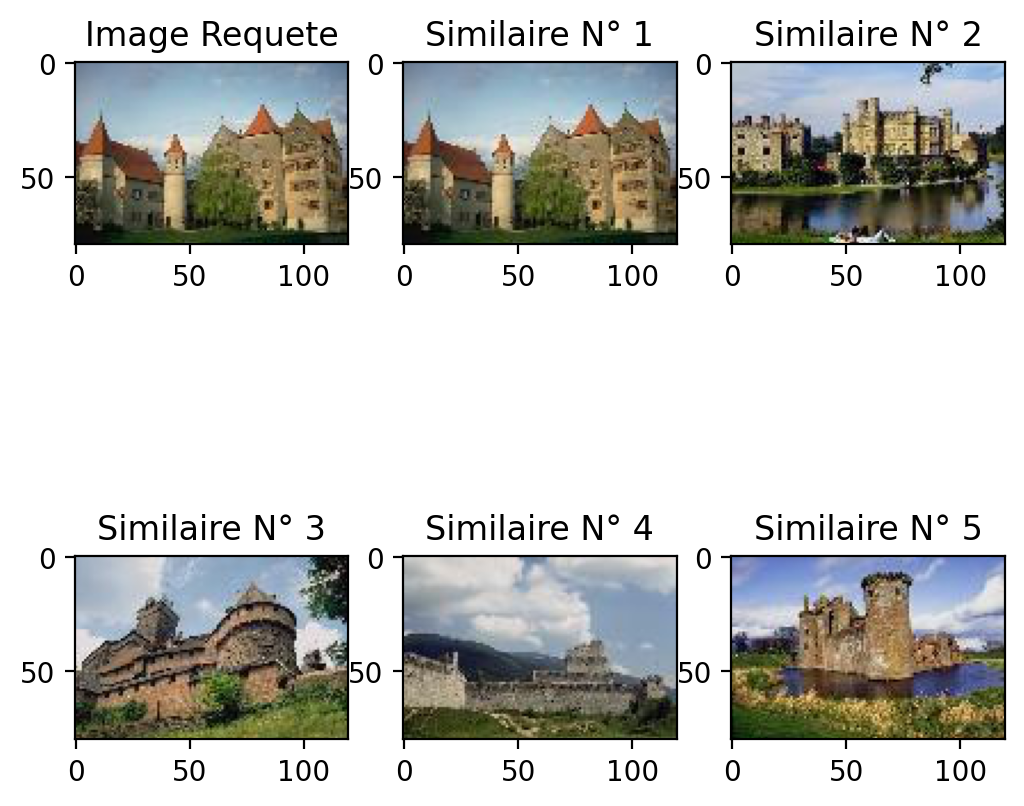

In [37]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distances_CBIR_H[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))

# Par Texture

Forme et texture
Forme => 7 coff des moment de Hu
texture => glcm: 4 informations..

In [39]:
import skimage.feature as feature

def texture (image) :
  gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
  graycom = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256)
  contrast = feature.greycoprops(graycom, 'contrast')
  homogeneity = feature.greycoprops(graycom, 'homogeneity')
  energy = feature.greycoprops(graycom, 'energy')
  correlation = feature.greycoprops(graycom, 'correlation')

  list=[]
  list.append(np.mean(contrast/np.sum(contrast)))
  list.append(np.mean(homogeneity/np.sum(homogeneity)))
  list.append(np.mean(energy/np.sum(energy)))
  list.append(np.mean(correlation/np.sum(correlation)))

  list = np.ravel(list)
  return list

def CBIR_IndexationT():
  features=[texture(loaded_images[0])]
  for i in range (len(loaded_images)-1):
    features = np.vstack([features,texture(loaded_images[i+1])])
  return features

index_MatrixT=CBIR_IndexationT()
print(index_MatrixT.shape)

def CBIR_RechercheT(Imreq,ind_Matrix):
  distances = {}
  Im=texture(Imreq)
  for i in range (len(loaded_images)):
    distances[i]=dist.euclidean(ind_Matrix[i], Im)
  distances= sorted(distances.items(),key=lambda x:x[1])
  return distances

distances_CBIR_T=CBIR_RechercheT(img_requete,index_MatrixT)
print(distances_CBIR_T)

(270, 4)
[(61, 0.0), (161, 0.0), (133, 2.7755575615628914e-17), (229, 2.7755575615628914e-17), (3, 5.551115123125783e-17), (9, 5.551115123125783e-17), (24, 5.551115123125783e-17), (25, 5.551115123125783e-17), (34, 5.551115123125783e-17), (51, 5.551115123125783e-17), (57, 5.551115123125783e-17), (58, 5.551115123125783e-17), (64, 5.551115123125783e-17), (65, 5.551115123125783e-17), (76, 5.551115123125783e-17), (79, 5.551115123125783e-17), (84, 5.551115123125783e-17), (85, 5.551115123125783e-17), (86, 5.551115123125783e-17), (94, 5.551115123125783e-17), (127, 5.551115123125783e-17), (155, 5.551115123125783e-17), (157, 5.551115123125783e-17), (159, 5.551115123125783e-17), (165, 5.551115123125783e-17), (186, 5.551115123125783e-17), (248, 5.551115123125783e-17), (252, 5.551115123125783e-17), (16, 6.206335383118183e-17), (40, 6.206335383118183e-17), (46, 6.206335383118183e-17), (70, 6.206335383118183e-17), (74, 6.206335383118183e-17), (121, 6.206335383118183e-17), (126, 6.206335383118183e-17)

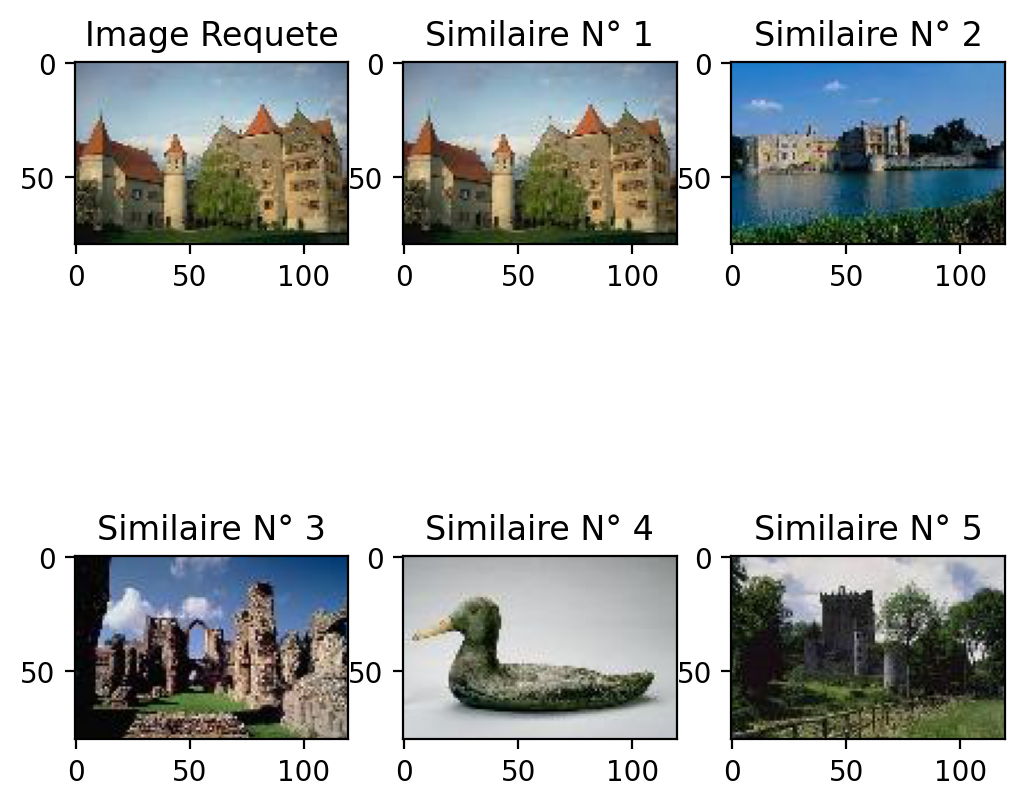

In [40]:
distances_CBIRT=CBIR_RechercheT(img_requete,index_MatrixT)
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distances_CBIRT[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))

# Par Forme

In [41]:
from matplotlib.lines import VertexSelector
import numpy as np
import cv2 as cv
def form(image):
  img = cv.cvtColor(np.array(image), cv.COLOR_BGR2GRAY)
  contours,v = cv.findContours(img, 1, 2)
  cont = contours[0]
  m = cv.moments(cont)
  huMoments = cv2.HuMoments(m)
  huMoments = np.ravel(huMoments)
  return huMoments

def CBIR_IndexationF():
  features=[form(loaded_images[0])]
  for i in range (len(loaded_images)-1):
    features = np.vstack([features,form(loaded_images[i+1])])
  return features

index_MatrixF=CBIR_IndexationF()
print(index_MatrixF.shape)

def CBIR_RechercheF(Imreq,ind_Matrix):
  distances = {}
  Im=form(Imreq)
  for i in range (len(loaded_images)):
    distances[i]=dist.euclidean(ind_Matrix[i], Im)
  distances= sorted(distances.items(),key=lambda x:x[1])
  return distances

distances_CBIR_F=CBIR_RechercheF(img_requete,index_MatrixF)
print(distances_CBIR_F)  

(270, 7)
[(61, 0.0), (0, 2.82844274435492e-23), (72, 3.099134608289578e-23), (17, 4.815539687605995e-23), (185, 4.903534986385136e-23), (117, 5.637549207510794e-23), (45, 6.365510684871467e-23), (64, 7.578362629260639e-23), (175, 8.850722073473752e-23), (19, 1.0199482671404287e-22), (33, 3.552713678800501e-15), (51, 3.552713678800501e-15), (79, 3.552713678800501e-15), (58, 4.440892098500626e-15), (71, 4.440892098500626e-15), (106, 4.6629367034256575e-15), (132, 4.6629367034256575e-15), (174, 4.6629367034256575e-15), (27, 1.4210854715202004e-14), (119, 1.4210854715202004e-14), (133, 1.4210854715202004e-14), (148, 1.4210854715202004e-14), (153, 1.4210854715202004e-14), (4, 1.4210854715202007e-14), (28, 1.4210854715202007e-14), (56, 1.4210854715202007e-14), (160, 1.4210854715202007e-14), (172, 1.4210854715202007e-14), (181, 1.4210854715202007e-14), (25, 7.105427357601002e-14), (34, 7.105427357601002e-14), (48, 7.105427357601002e-14), (57, 7.105427357601002e-14), (69, 7.105427357601002e-14

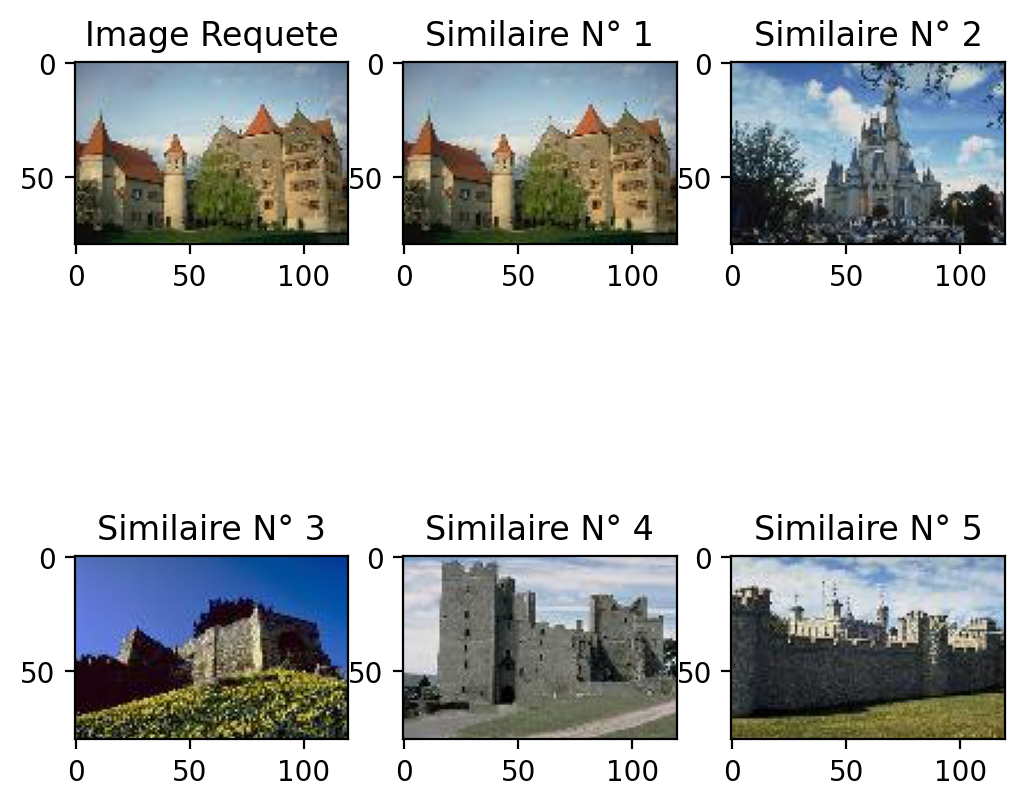

In [43]:
distances_CBIRF=CBIR_RechercheF(img_requete,index_MatrixF)
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
  ax1 = fig.add_subplot(2, 3, i+2)
  ax1.imshow(loaded_images[distances_CBIRF[i][0]])
  ax1.set_title('Similaire N° %s' %(i+1))